<a href="https://colab.research.google.com/github/Affan75/Affan75/blob/main/KNN_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo (1).csv


In [ ]:
zoo= pd.read_csv('Zoo.csv')

In [ ]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
zoo.duplicated().sum()

0

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbl= LabelEncoder()

In [ ]:
animal_name= zoo.index.get_level_values(0)

In [ ]:
animal_name_lbl= lbl.fit_transform(animal_name)

In [ ]:
animal_name_lbl

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
zoo.insert(0, 'animal_name', animal_name_lbl)

In [ ]:
zoo.drop('animal name', axis= 1, inplace= True)

In [ ]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


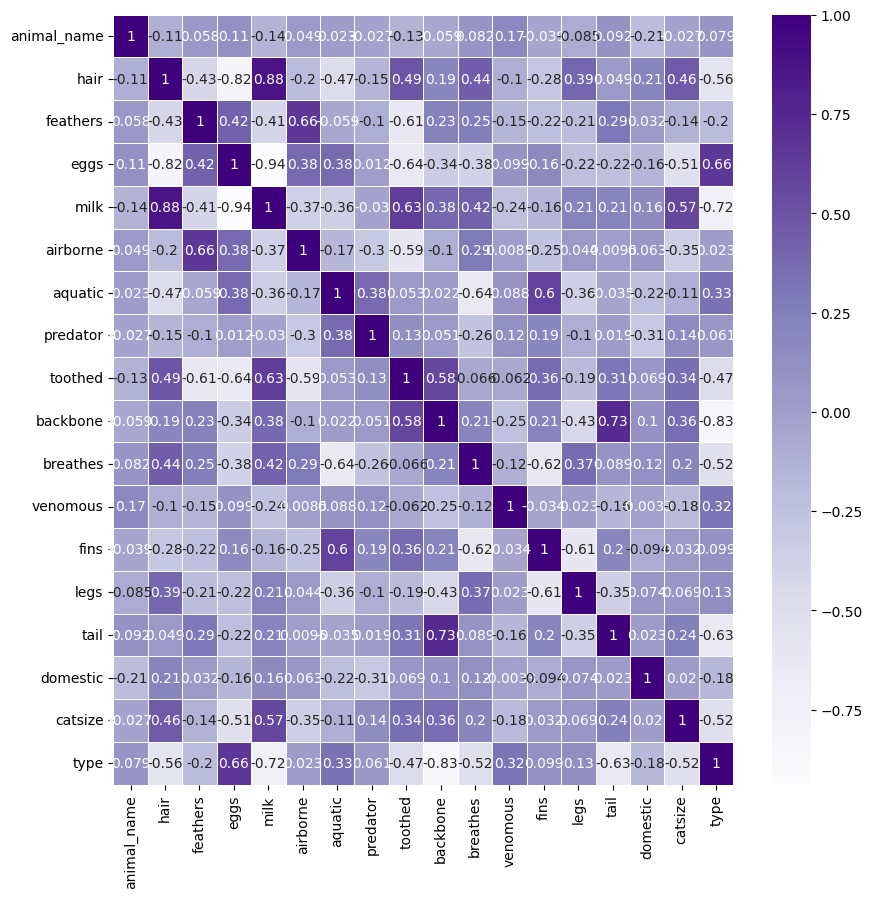

In [ ]:
#correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(zoo.corr(), linewidths= 0.5, annot= True, cmap= 'Purples')
plt.show()

In [ ]:
x= zoo.iloc[ : , : 17]

In [ ]:
x

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y= zoo.iloc[ : , 17]

In [ ]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=55)

In [ ]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV

In [ ]:
n_neighbors=np.array(range(1,30))
param_grid=dict(n_neighbors=n_neighbors)

In [ ]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)

In [ ]:
grid.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.4057142857142857
{'n_neighbors': 19}


In [ ]:
k_range=range(1,31)
k_scores=[]

In [ ]:
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x_train, y_train, cv=5)
  k_scores.append(scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

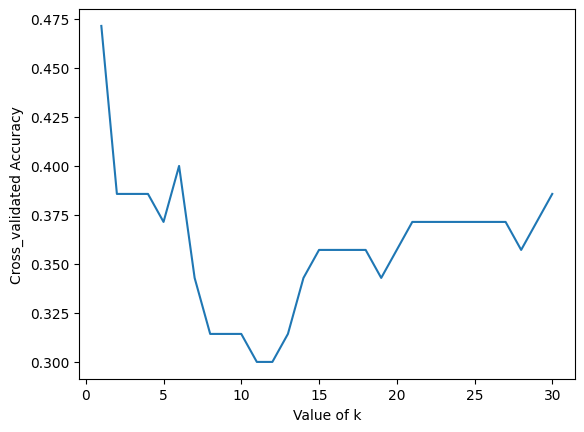

In [ ]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of k')
plt.ylabel('Cross_validated Accuracy')
plt.show()

In [ ]:
pd.Series(k_scores).sort_values(ascending=False)

0     0.471429
5     0.400000
2     0.385714
29    0.385714
3     0.385714
1     0.385714
28    0.371429
26    0.371429
25    0.371429
24    0.371429
23    0.371429
22    0.371429
21    0.371429
20    0.371429
4     0.371429
19    0.357143
17    0.357143
16    0.357143
14    0.357143
15    0.357143
27    0.357143
18    0.342857
13    0.342857
6     0.342857
12    0.314286
9     0.314286
8     0.314286
7     0.314286
11    0.300000
10    0.300000
dtype: float64

In [ ]:
model=KNeighborsClassifier(n_neighbors=1)

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
ypred= model.predict(x_test)
y_pred=pd.DataFrame(ypred)
y_pred

,0
0,1
1,1
2,2
3,2
4,1
5,2
6,2
7,2
8,2
9,1


In [ ]:
y_test

28    1
93    1
99    7
96    1
85    7
34    4
38    4
86    4
17    1
75    1
5     1
90    3
9     1
6     1
22    1
88    6
4     1
83    2
23    2
63    1
40    6
78    2
14    7
64    1
8     4
56    2
98    1
36    1
82    4
47    1
79    2
Name: type, dtype: int64

#Interview Questions:

1. What are the key hyperparameters in KNN?
Ans:-
Number of Neighbors (k): This is the primary hyperparameter and determines how many neighbors are considered to make the classification or regression decision. Choosing the right value for k is crucial as a small value can make the model sensitive to noise, while a large value can smooth out the decision boundary too much.

Distance Metric: This defines how the distance between data points is measured. Common distance metrics include:

Euclidean Distance: The most common choice, calculated as the straight-line distance between two points in Euclidean space.

Manhattan Distance: Also known as L1 distance, calculated as the sum of the absolute differences between the coordinates of the points.

Minkowski Distance: A generalization of Euclidean and Manhattan distances, controlled by a parameter p=2, it is Euclidean distance, and when p=1, it is Manhattan distance.

Weight Function: This determines whether all neighbors contribute equally to the prediction or if closer neighbors have a greater influence. Common options include:

Uniform Weights: All neighbors are weighted equally.
Distance Weights: Closer neighbors have a higher influence on the prediction than farther neighbors.
Algorithm for Finding Neighbors: This affects the efficiency of the KNN algorithm. Options include:

Brute Force: Computes the distance between the query point and all training points.
KD-Tree: A tree-based structure that can speed up nearest neighbor searches in low-dimensional spaces.
Ball Tree: Similar to KD-Tree but can be more efficient in higher-dimensional spaces.

Leaf Size (for KD-Tree and Ball Tree): This is the size of the leaf nodes in the tree structure and can affect the speed and memory requirements of the algorithm. It needs to be tuned for optimal performance.

2. What distance metrics can be used in KNN?
Ans:-
In K-Nearest Neighbors (KNN), various distance metrics can be used to measure the similarity or dissimilarity between data points. The choice of distance metric can significantly affect the performance of the KNN algorithm. Here are some commonly used distance metrics:

1.Euclidean Distance:It is the most commonly used distance metric and represents the straight-line distance between two points in Euclidean space.

2.Manhattan Distance (L1 Distance or Taxicab Distance):It calculates the sum of the absolute differences of the coordinates.

3.Minkowski Distance: It generalizes both Euclidean and Manhattan distances by varying the parameter p=1, it is equivalent to Manhattan distance, and when p=2, it is equivalent to Euclidean distance.

4.Chebyshev Distance: It is a special case of the Minkowski distance with
p→∞. It measures the maximum difference along any coordinate dimension.

5.Cosine Similarity: This metric is often used when dealing with high-dimensional data, such as text data, where the magnitude of the vectors is less important than their orientation.

6.Hamming Distance: It is used for categorical data and counts the number of positions at which the corresponding elements are different.

7.Mahalanobis Distance: It accounts for the correlations between variables by using the covariance matrix S of the dataset, making it useful for multivariate data.

8.Jaccard Distance: This metric is used for comparing the similarity and diversity of sample sets, particularly for binary attributes.

The choice of distance metric depends on the nature of the data and the specific problem at hand. For continuous numerical data, Euclidean and Manhattan distances are commonly used. For categorical data, Hamming or Jaccard distances might be more appropriate. For text or high-dimensional data, cosine similarity is often preferred.










